In [32]:
import csv
from pathlib import Path
from copy import deepcopy

In [33]:
cwd = Path.cwd()

In [34]:
cwd

WindowsPath('C:/Users/hankm')

In [36]:
pth = cwd / Path('data.csv')
pth.exists()

True

In [37]:
# Create a matrix of values holding data for each country

csv_matrix = None
csv_reader = None
with open(str(pth)) as fp:
    csv_reader = csv.reader(fp)
    csv_matrix = [deepcopy(l) for l in csv_reader]

In [38]:
csv_matrix

[['ï»¿Country Name',
  'Region Code',
  'Country Code',
  'GDP, PPP (current international $)',
  ' Population, total ',
  'Population CGR 1960-2015',
  'Internet users (per 100 people)',
  'Popltn Largest City % of Urban Pop',
  '2014 Life expectancy at birth, total (years)',
  'Literacy rate, adult female (% of females ages 15 and above)',
  'Exports of goods and services (% of GDP)'],
 ['Aruba',
  'MA',
  'ABW',
  '',
  ' 103,889 ',
  '1.19%',
  '88.7',
  '',
  '75.5',
  '97.51396179',
  ''],
 ['Andorra', 'EU', 'AND', '', ' 70,473 ', '3.06%', '96.9', '', '', '', ''],
 ['Afghanistan',
  'ME',
  'AFG',
  ' 62,912,669,167 ',
  ' 32,526,562 ',
  '2.36%',
  '8.3',
  '53.4%',
  '60.4',
  '23.87384987',
  '0.073278412'],
 ['Angola',
  'AF',
  'AGO',
  ' 184,437,662,368 ',
  ' 25,021,974 ',
  '2.87%',
  '12.4',
  '50.0%',
  '52.3',
  '60.74480057',
  '0.373074223'],
 ['Albania',
  'EU',
  'ALB',
  ' 32,663,238,936 ',
  ' 2,889,167 ',
  '1.07%',
  '63.3',
  '27.3%',
  '77.8',
  '96.76969147'

In [42]:
# Getting the header to know which columns coorespond to what values
header = csv_matrix[0]
header

['ï»¿Country Name',
 'Region Code',
 'Country Code',
 'GDP, PPP (current international $)',
 ' Population, total ',
 'Population CGR 1960-2015',
 'Internet users (per 100 people)',
 'Popltn Largest City % of Urban Pop',
 '2014 Life expectancy at birth, total (years)',
 'Literacy rate, adult female (% of females ages 15 and above)',
 'Exports of goods and services (% of GDP)']

In [43]:
for i in range(len(header)):
    header[i] = header[i].strip()

In [44]:
header

['ï»¿Country Name',
 'Region Code',
 'Country Code',
 'GDP, PPP (current international $)',
 'Population, total',
 'Population CGR 1960-2015',
 'Internet users (per 100 people)',
 'Popltn Largest City % of Urban Pop',
 '2014 Life expectancy at birth, total (years)',
 'Literacy rate, adult female (% of females ages 15 and above)',
 'Exports of goods and services (% of GDP)']

In [45]:
# Strip all excess whitespace off strings in matrix

for i in range(len(csv_matrix)):
    for j in range(len(csv_matrix[i])):
        csv_matrix[i][j] = csv_matrix[i][j].strip()

In [46]:
csv_matrix

[['ï»¿Country Name',
  'Region Code',
  'Country Code',
  'GDP, PPP (current international $)',
  'Population, total',
  'Population CGR 1960-2015',
  'Internet users (per 100 people)',
  'Popltn Largest City % of Urban Pop',
  '2014 Life expectancy at birth, total (years)',
  'Literacy rate, adult female (% of females ages 15 and above)',
  'Exports of goods and services (% of GDP)'],
 ['Aruba',
  'MA',
  'ABW',
  '',
  '103,889',
  '1.19%',
  '88.7',
  '',
  '75.5',
  '97.51396179',
  ''],
 ['Andorra', 'EU', 'AND', '', '70,473', '3.06%', '96.9', '', '', '', ''],
 ['Afghanistan',
  'ME',
  'AFG',
  '62,912,669,167',
  '32,526,562',
  '2.36%',
  '8.3',
  '53.4%',
  '60.4',
  '23.87384987',
  '0.073278412'],
 ['Angola',
  'AF',
  'AGO',
  '184,437,662,368',
  '25,021,974',
  '2.87%',
  '12.4',
  '50.0%',
  '52.3',
  '60.74480057',
  '0.373074223'],
 ['Albania',
  'EU',
  'ALB',
  '32,663,238,936',
  '2,889,167',
  '1.07%',
  '63.3',
  '27.3%',
  '77.8',
  '96.76969147',
  '0.271049845']

In [52]:
# Create an internet dictionary which maps internet usage rates to countries.

internet = {}
for i in range(1, len(csv_matrix)):
    if csv_matrix[i][6] == '':
        continue
    
    if float(csv_matrix[i][6]) in internet:
        internet[float(csv_matrix[i][6])].append(csv_matrix[i][0])
    else:
        internet[float(csv_matrix[i][6])] = [csv_matrix[i][0]]
        
internet
    

{88.7: ['Aruba'],
 96.9: ['Andorra'],
 8.3: ['Afghanistan'],
 12.4: ['Angola'],
 63.3: ['Albania'],
 39.5: ['Arab World'],
 91.2: ['United Arab Emirates'],
 69.4: ['Argentina'],
 58.2: ['Armenia'],
 65.2: ['Antigua and Barbuda'],
 84.6: ['Australia'],
 83.9: ['Austria'],
 77.0: ['Azerbaijan', 'Cayman Islands'],
 4.9: ['Burundi'],
 85.1: ['Belgium'],
 6.8: ['Benin'],
 11.4: ['Burkina Faso'],
 14.4: ['Bangladesh'],
 56.7: ['Bulgaria'],
 93.5: ['Bahrain'],
 78.0: ['Bahamas, The'],
 65.1: ['Bosnia and Herzegovina'],
 62.2: ['Belarus'],
 41.6: ['Belize'],
 98.3: ['Bermuda'],
 45.1: ['Bolivia'],
 59.1: ['Brazil'],
 76.1: ['Barbados'],
 71.2: ['Brunei Darussalam'],
 39.8: ['Bhutan', 'Middle income'],
 27.5: ['Botswana'],
 4.6: ['Central African Republic'],
 88.5: ['Canada'],
 68.2: ['Central Europe and the Baltics'],
 88.0: ['Switzerland'],
 64.3: ['Chile'],
 50.3: ['China'],
 21.0: ["Cote d'Ivoire", 'Zambia'],
 20.7: ['Cameroon'],
 7.6: ['Congo, Rep.'],
 55.9: ['Colombia'],
 7.5: ['Comoros']

In [53]:
# Find the highest ranked and lowest ranked countries by internet usage

l = []
for k in sorted(internet.keys()):
    l.append(internet[k])

In [54]:
l

[['Eritrea'],
 ['Somalia'],
 ['Niger'],
 ['Sierra Leone'],
 ['Chad'],
 ['Guinea-Bissau'],
 ['Congo, Dem. Rep.'],
 ['Madagascar'],
 ['Central African Republic'],
 ['Guinea'],
 ['Burundi'],
 ['Tanzania'],
 ['Liberia'],
 ['Benin'],
 ['Togo'],
 ['Comoros'],
 ['Congo, Rep.'],
 ['Papua New Guinea'],
 ['Afghanistan'],
 ['Mozambique'],
 ['Malawi'],
 ['Low income'],
 ['Solomon Islands'],
 ['Mali'],
 ['Burkina Faso'],
 ['Ethiopia'],
 ['Djibouti'],
 ['Heavily indebted poor countries (HIPC)'],
 ['Haiti'],
 ['Angola'],
 ['Least developed countries: UN classification'],
 ['Kiribati'],
 ['Timor-Leste'],
 ['Bangladesh'],
 ['IDA only'],
 ['Fragile and conflict affected situations', 'Turkmenistan'],
 ['Mauritania'],
 ['Lesotho'],
 ['Zimbabwe'],
 ['Gambia, The'],
 ['Iraq'],
 ['Nepal'],
 ['South Sudan'],
 ['Pakistan', 'Rwanda'],
 ['Lao PDR'],
 ['Cambodia', 'Libya', 'Tajikistan'],
 ['Uganda'],
 ['Marshall Islands'],
 ['Nicaragua'],
 ['Honduras'],
 ['Cameroon'],
 ["Cote d'Ivoire", 'Zambia'],
 ['Pre-demograp

In [55]:
# Create a dictionary mapping internet rates to literacy

int_lit = {}

for i in range(1, len(csv_matrix)):
    int_rate = csv_matrix[i][6]
    int_rate = int_rate.strip()
    if int_rate != '':
        int_rate = float(int_rate)
    else:
        continue
        
    lit_rate = csv_matrix[i][9]
    lit_rate = lit_rate.strip()
    if lit_rate != '':
        lit_rate = float(lit_rate)
    else:
        continue
        
    if int_rate in int_lit:
        int_lit[int_rate].append(lit_rate)
    else:
        int_lit[int_rate] = [lit_rate]
        
int_lit

{88.7: [97.51396179],
 8.3: [23.87384987],
 12.4: [60.74480057],
 63.3: [96.76969147],
 91.2: [95.07633972],
 69.4: [98.13478088],
 58.2: [99.73046875],
 77.0: [99.73451996],
 4.9: [82.91288757],
 6.8: [27.28825951],
 11.4: [28.34884071],
 14.4: [58.31364059],
 56.7: [98.06880951],
 93.5: [93.43386078],
 65.1: [97.42954254],
 62.2: [99.66835022],
 41.6: [83.31381989],
 45.1: [92.87606049],
 59.1: [92.86592102],
 71.2: [95.44203186],
 39.8: [55.11819077],
 27.5: [89.21347046],
 4.6: [24.35548973],
 64.3: [96.50222015],
 50.3: [94.47138977],
 21.0: [32.72970963, 80.56697083],
 20.7: [68.88101196],
 7.6: [72.87705994],
 55.9: [94.67140198],
 7.5: [74.25520325],
 43.0: [84.65950775],
 59.8: [97.71025085],
 31.1: [99.76821899],
 71.7: [98.64279938],
 51.9: [92.96755219, 93.42893219],
 38.2: [73.05513, 89.23513794],
 48.9: [93.59758759],
 35.9: [68.05779266],
 1.1: [65.60877228],
 78.7: [97.4969635],
 88.4: [99.80470276],
 11.6: [40.96794128],
 23.5: [81.1102066, 71.35002136],
 45.2: [99.733

In [66]:
# Create a list of X and Y points to be used for plotting

X = []
Y = []
for k in sorted(int_lit.keys()):
    for v in int_lit[k]:
        X.append(k)
        Y.append(v)
    
X, Y

([1.1,
  2.2,
  2.5,
  2.7,
  3.5,
  3.8,
  4.2,
  4.6,
  4.7,
  4.9,
  5.4,
  5.9,
  6.8,
  7.1,
  7.5,
  7.6,
  7.9,
  8.3,
  9.0,
  9.3,
  10.3,
  11.4,
  11.6,
  12.2,
  12.4,
  13.4,
  14.4,
  15.0,
  15.2,
  16.1,
  16.4,
  17.1,
  17.2,
  17.6,
  17.9,
  18.0,
  18.0,
  18.2,
  19.0,
  19.0,
  19.0,
  19.2,
  19.3,
  19.7,
  20.4,
  20.7,
  21.0,
  21.0,
  21.3,
  21.4,
  21.7,
  21.8,
  22.0,
  22.3,
  22.4,
  23.5,
  23.5,
  25.1,
  25.4,
  25.8,
  26.0,
  26.6,
  26.9,
  27.1,
  27.5,
  30.0,
  30.0,
  30.2,
  30.4,
  31.1,
  35.9,
  38.2,
  38.2,
  39.3,
  39.8,
  40.7,
  40.9,
  41.6,
  42.8,
  42.8,
  43.0,
  43.2,
  44.1,
  44.4,
  45.0,
  45.1,
  45.2,
  45.6,
  47.4,
  48.5,
  48.9,
  49.3,
  49.8,
  50.1,
  50.3,
  51.2,
  51.9,
  51.9,
  52.7,
  53.4,
  53.7,
  54.5,
  55.8,
  55.9,
  56.7,
  57.1,
  57.4,
  57.4,
  58.1,
  58.2,
  59.1,
  59.8,
  61.9,
  62.2,
  63.3,
  64.3,
  64.6,
  64.6,
  65.1,
  65.3,
  65.6,
  66.8,
  68.0,
  68.6,
  69.2,
  69.4,
  69.6,
  69

In [67]:
import matplotlib.pyplot as plt

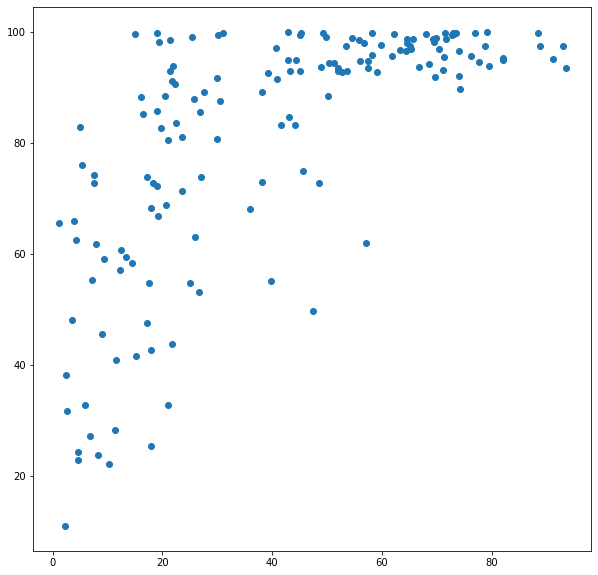

In [73]:
# Plot the points

plt.figure(figsize=(10,10))
plt.scatter(X, Y)

In [74]:
# Creating a new dictionary which maps literacy rates to internet rates

lit_int = {}

for i in range(1, len(csv_matrix)):
    int_rate = csv_matrix[i][6]
    int_rate = int_rate.strip()
    if int_rate != '':
        int_rate = float(int_rate)
    else:
        continue
        
    lit_rate = csv_matrix[i][9]
    lit_rate = lit_rate.strip()
    if lit_rate != '':
        lit_rate = float(lit_rate)
    else:
        continue
        
    if int_rate in lit_int:
        lit_int[lit_rate].append(int_rate)
    else:
        lit_int[lit_rate] = [int_rate]
        
lit_int

{97.51396179: [88.7],
 23.87384987: [8.3],
 60.74480057: [12.4],
 96.76969147: [63.3],
 95.07633972: [91.2],
 98.13478088: [69.4],
 99.73046875: [58.2],
 99.73451996: [77.0],
 82.91288757: [4.9],
 27.28825951: [6.8],
 28.34884071: [11.4],
 58.31364059: [14.4],
 98.06880951: [56.7],
 93.43386078: [93.5],
 97.42954254: [65.1],
 99.66835022: [62.2],
 83.31381989: [41.6],
 92.87606049: [45.1],
 92.86592102: [59.1],
 95.44203186: [71.2],
 55.11819077: [39.8],
 89.21347046: [27.5],
 24.35548973: [4.6],
 96.50222015: [64.3],
 94.47138977: [50.3],
 32.72970963: [21.0],
 68.88101196: [20.7],
 72.87705994: [7.6],
 94.67140198: [55.9],
 74.25520325: [7.5],
 84.65950775: [43.0],
 97.71025085: [59.8],
 99.76821899: [31.1],
 98.64279938: [71.7],
 92.96755219: [51.9],
 73.05513: [38.2],
 93.59758759: [48.9],
 68.05779266: [35.9],
 65.60877228: [1.1],
 97.4969635: [78.7],
 99.80470276: [88.4],
 40.96794128: [11.6],
 81.1102066: [23.5],
 99.73381805: [45.2],
 71.35002136: [23.5],
 22.87104034: [4.7],
 

In [75]:
# Add points to x and y for plotting

x = []
y = []
for k in sorted(lit_int.keys()):
    for v in lit_int[k]:
        x.append(k)
        y.append(v)
    
x, y

([11.01572037,
  22.1957798,
  22.87104034,
  23.87384987,
  24.35548973,
  25.39306068,
  27.28825951,
  28.34884071,
  31.75429916,
  32.72970963,
  32.81483078,
  38.18144989,
  40.96794128,
  41.6115303,
  42.72716904,
  43.80036163,
  45.52547073,
  47.64488983,
  48.13655853,
  49.68019867,
  53.12355042,
  54.7505188,
  54.85063171,
  55.11819077,
  55.30268097,
  57.17098999,
  58.31364059,
  59.03110886,
  59.50658035,
  60.74480057,
  61.77299118,
  62.04611969,
  62.6137886,
  62.98471832,
  65.60877228,
  65.8973465,
  66.78479767,
  68.05779266,
  68.26931763,
  68.88101196,
  71.35002136,
  72.29683685,
  72.80232239,
  72.82441711,
  72.87705994,
  73.05513,
  73.83075714,
  73.91976929,
  74.25520325,
  74.969841,
  76.08978271,
  80.56697083,
  80.72493744,
  81.1102066,
  82.64549255,
  82.91288757,
  83.1818924,
  83.31381989,
  83.67617798,
  84.65950775,
  85.28513336,
  85.60791779,
  85.81128693,
  87.49803925,
  87.960289,
  88.28749847,
  88.45311737,
  88.5259

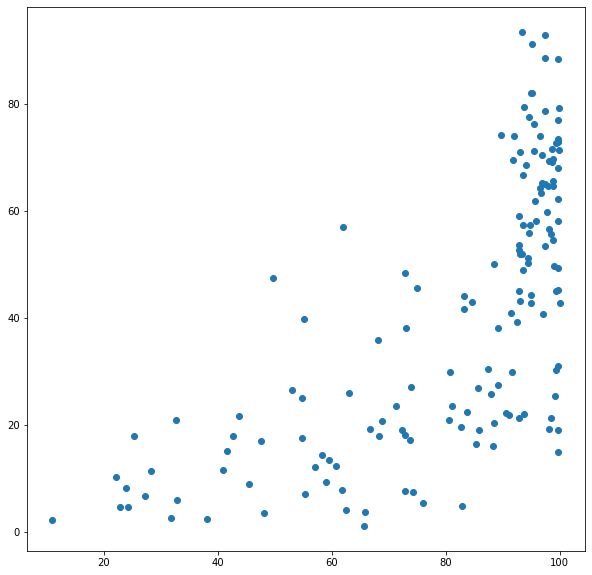

In [77]:
# Plot the internet rate vs. literacy

plt.figure(figsize=(10,10))
plt.scatter(x, y, label='Internet Rate vs. Literacy Rate')

In [ ]:
# In the end we can conclude that there does appear to be a rough coorelation
# from literacy rate to internet usage, although a weak one.